## KNN Classification with Scikit-learn on Iris Dataset


# Import necessary libraries

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from collections import Counter

# Load Iris dataset

In [3]:
iris = load_iris()
X = iris.data
y = iris.target

# Split into training and test sets

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize features

In [5]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Plot accuracy vs k

In [6]:
def plot_knn_accuracy():
    accuracy = []
    for k in range(1, 21):
        knn = KNeighborsClassifier(n_neighbors=k)
        knn.fit(X_train, y_train)
        y_pred = knn.predict(X_test)
        accuracy.append(accuracy_score(y_test, y_pred))

    plt.figure(figsize=(10, 6))
    plt.plot(range(1, 21), accuracy, color='blue', linestyle='dashed', marker='o', markerfacecolor='red')
    plt.title('Accuracy vs K Value')
    plt.xlabel('K')
    plt.ylabel('Accuracy')
    plt.show()

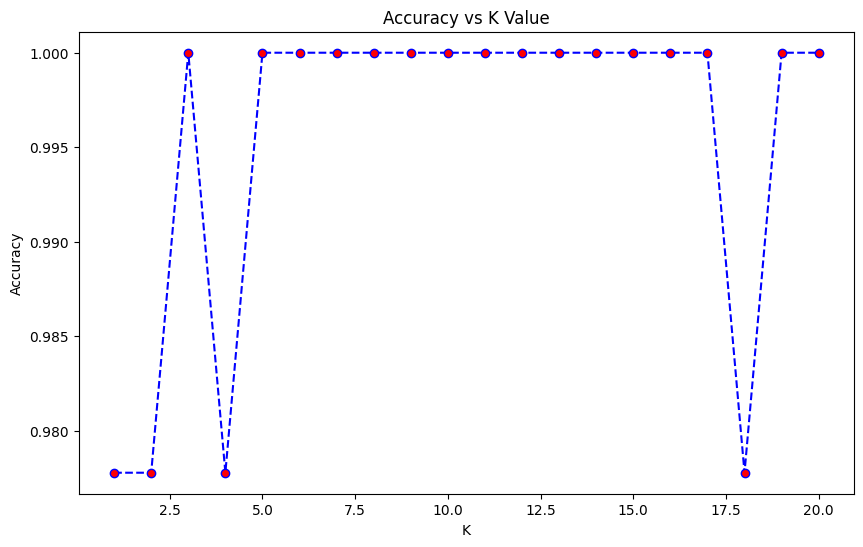

In [7]:
plot_knn_accuracy()

## Custom KNN Implementation with Four Distance Metrics

# Distance Functions

In [8]:
def euclidean_distance(x1, x2):
    return np.sqrt(np.sum((x1 - x2) ** 2))

def manhattan_distance(x1, x2):
    return np.sum(np.abs(x1 - x2))

def minkowski_distance(x1, x2, p=3):
    return np.sum(np.abs(x1 - x2) ** p) ** (1 / p)

def chebyshev_distance(x1, x2):
    return np.max(np.abs(x1 - x2))

# KNN Classifier Implementation

In [20]:
class CustomKNN:
    def __init__(self, k=3, distance='euclidean'):
        self.k = k
        self.distance = distance

    def fit(self, X_train, y_train):
        self.X_train = X_train
        self.y_train = y_train

    def predict(self, X_test):
        predictions = [self._predict(x) for x in X_test]
        return np.array(predictions)

    def _predict(self, x):
        # Compute distances between x and all examples in the training set
        distances = [self._compute_distance(x, x_train) for x_train in self.X_train]
        # Get the nearest k neighbors
        k_indices = np.argsort(distances)[:self.k]

        # Ensure indices are within range
        k_indices = [i for i in k_indices if i < len(self.y_train)]

        k_nearest_labels = [self.y_train[i] for i in k_indices]

        # Return the most common class label
        most_common = Counter(k_nearest_labels).most_common(1)
        return most_common[0][0]


    def _compute_distance(self, x1, x2):
        if self.distance == 'euclidean':
            return euclidean_distance(x1, x2)
        elif self.distance == 'manhattan':
            return manhattan_distance(x1, x2)
        elif self.distance == 'minkowski':
            return minkowski_distance(x1, x2)
        elif self.distance == 'chebyshev':
            return chebyshev_distance(x1, x2)

# Data

In [21]:
# Load Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Evaluate the custom KNN


In [22]:
def evaluate_knn(k, distance_metric):
    knn = CustomKNN(k=k, distance=distance_metric)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f'Accuracy with k={k} and {distance_metric} distance: {accuracy * 100:.2f}%')

In [23]:
for dist_metric in ['euclidean', 'manhattan', 'minkowski', 'chebyshev']:
    evaluate_knn(k=5, distance_metric=dist_metric)

Accuracy with k=5 and euclidean distance: 100.00%
Accuracy with k=5 and manhattan distance: 100.00%
Accuracy with k=5 and minkowski distance: 100.00%
Accuracy with k=5 and chebyshev distance: 95.56%


## Custom KNN on Pima Indians Diabetes Dataset


# Imports

In [15]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

# Load Pima Indians Diabetes dataset

In [16]:
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv"
column_names = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']
data = pd.read_csv(url, names=column_names)

# Data Preprocessing

In [24]:
X = data.drop('Outcome', axis=1)
y = data['Outcome']

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

#  Apply custom KNN

In [27]:
knn = CustomKNN(k=5, distance='euclidean')
y_train = y_train.to_numpy()
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

Accuracy

In [28]:
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy on Pima Indians dataset with custom KNN: {accuracy * 100:.2f}%')

Accuracy on Pima Indians dataset with custom KNN: 70.13%
